In [1]:
import pandas as pd
data = pd.read_csv('preprocessed_data.csv')

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

## Splitting the data into X and Y labels where X is feutures and Y is Prediction class

In [3]:
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
X.head(1)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05


## Splitting the data into Train, CV and Test where out of all the data 70% is used for training model and 30% will be used for testing the model

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.3, stratify=y_train)

## Calculating Bag of Words for essay column

In [5]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)


vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4))
vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer.transform(X_train['essay'].values)
X_cv_essay_bow = vectorizer.transform(X_cv['essay'].values)
X_test_essay_bow = vectorizer.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)

(53531, 8) (53531,)
(22942, 8) (22942,)
(32775, 8) (32775,)
After vectorizations
(53531, 182500) (53531,)
(22942, 182500) (22942,)
(32775, 182500) (32775,)


## Calculating TF-IDF for essay column

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(X_train['essay'])

# text_tfidf = vectorizer.fit_transform(preprocessed_essays)
X_train_essay_tf_idf = vectorizer.transform(X_train['essay'])
X_cv_essay_tf_idf = vectorizer.transform(X_cv['essay'])
X_test_essay_tf_idf = vectorizer.transform(X_test['essay'])

print("Shape of matrix after tfidf")
print(X_train_essay_tf_idf.shape)
print(X_cv_essay_tf_idf.shape)
print(X_test_essay_tf_idf.shape)

Shape of matrix after tfidf
(53531, 12597)
(22942, 12597)
(32775, 12597)


## Normalizing numerical feutures

### Normalizing the Price column

In [7]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(53531, 1) (53531,)
(22942, 1) (22942,)
(32775, 1) (32775,)


### Normalizing the teacher_number_of_previously_posted_projects column

In [8]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_preposted_projects_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_preposted_projects_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_preposted_projects_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_preposted_projects_norm.shape, y_train.shape)
print(X_cv_preposted_projects_norm.shape, y_cv.shape)
print(X_test_preposted_projects_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(53531, 1) (53531,)
(22942, 1) (22942,)
(32775, 1) (32775,)


## One hot encoding for all the categorical feutures

### one hot encoding for school state

In [9]:
vectorizer = CountVectorizer(binary=True)
vectorizer.fit(X_train['school_state'].values)
X_train_school_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_cv_school_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_school_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("Shape of matrix after one hot encodig ")
print(X_train_school_state_ohe.shape)
print(X_cv_school_state_ohe.shape)
print(X_test_school_state_ohe.shape)

Shape of matrix after one hot encodig 
(53531, 51)
(22942, 51)
(32775, 51)


### one hot encoding for teacher prefix

In [10]:
vectorizer = CountVectorizer(binary=True)
vectorizer.fit(X_train['teacher_prefix'].values)
X_train_teacher_prefix_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_cv_teacher_prefix_ohe = vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_teacher_prefix_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

print("Shape of matrix after one hot encodig ")
print(X_train_teacher_prefix_ohe.shape)
print(X_cv_teacher_prefix_ohe.shape)
print(X_test_teacher_prefix_ohe.shape)

Shape of matrix after one hot encodig 
(53531, 5)
(22942, 5)
(32775, 5)


### one hot encoding of project grade category	

In [11]:
vectorizer = CountVectorizer(binary=True)
vectorizer.fit(X_train['project_grade_category'].values)
X_train_project_grade_category_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_cv_project_grade_category_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_project_grade_category_ohe = vectorizer.transform(X_test['project_grade_category'].values)

print("Shape of matrix after one hot encodig ")
print(X_train_project_grade_category_ohe.shape)
print(X_cv_project_grade_category_ohe.shape)
print(X_test_project_grade_category_ohe.shape)

Shape of matrix after one hot encodig 
(53531, 4)
(22942, 4)
(32775, 4)


### one hot encoding of categories

In [12]:
vectorizer = CountVectorizer(binary=True)
vectorizer.fit(X_train['clean_categories'].values)
X_train_categories_ohe = vectorizer.transform(X_train['clean_categories'].values)
X_cv_categories_ohe = vectorizer.transform(X_cv['clean_categories'].values)
X_test_categories_ohe = vectorizer.transform(X_test['clean_categories'].values)

print("Shape of matrix after one hot encodig ")
print(X_train_categories_ohe.shape)
print(X_cv_categories_ohe.shape)
print(X_test_categories_ohe.shape)

Shape of matrix after one hot encodig 
(53531, 9)
(22942, 9)
(32775, 9)


### one hot encoding for sub categories

In [13]:
vectorizer = CountVectorizer(binary=True)
vectorizer.fit(X_train['clean_subcategories'].values)
X_train_sub_categories_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
X_cv_sub_categories_ohe = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_sub_categories_ohe = vectorizer.transform(X_test['clean_subcategories'].values)

print("Shape of matrix after one hot encodig ")
print(X_train_sub_categories_ohe.shape)
print(X_cv_sub_categories_ohe.shape)
print(X_test_sub_categories_ohe.shape)

Shape of matrix after one hot encodig 
(53531, 30)
(22942, 30)
(32775, 30)


## Concatinating all the features

### Set 1: categorical, numerical features + preprocessed_eassay (BOW)

In [16]:
from scipy.sparse import hstack
X_train_set_1 = hstack((X_train_categories_ohe,X_train_project_grade_category_ohe,X_train_school_state_ohe,X_train_sub_categories_ohe,X_train_teacher_prefix_ohe, X_train_price_norm, X_train_preposted_projects_norm,X_train_essay_bow)).tocsr()
X_cv_set_1 = hstack((X_cv_categories_ohe,X_cv_project_grade_category_ohe,X_cv_school_state_ohe,X_cv_sub_categories_ohe,X_cv_teacher_prefix_ohe, X_cv_price_norm, X_cv_preposted_projects_norm,X_cv_essay_bow)).tocsr()
X_test_set_1 = hstack((X_test_categories_ohe,X_test_project_grade_category_ohe,X_test_school_state_ohe,X_test_sub_categories_ohe,X_test_teacher_prefix_ohe, X_test_price_norm, X_test_preposted_projects_norm,X_test_essay_bow)).tocsr()



print("Final Data matrix of set 1")
print(X_train_set_1.shape, y_train.shape)
print(X_cv_set_1.shape, y_cv.shape)
print(X_test_set_1.shape, y_test.shape)
print("="*100)


Final Data matrix of set 1
(53531, 182601) (53531,)
(22942, 182601) (22942,)
(32775, 182601) (32775,)


### Set 2: categorical, numerical features + preprocessed_eassay (TFIDF)

In [18]:
X_train_set_2 = hstack((X_train_categories_ohe,X_train_project_grade_category_ohe,
                        X_train_school_state_ohe,X_train_sub_categories_ohe,
                        X_train_teacher_prefix_ohe, X_train_price_norm, 
                        X_train_preposted_projects_norm,
                        X_train_essay_tf_idf)).tocsr()
X_cv_set_2 = hstack((X_cv_categories_ohe,X_cv_project_grade_category_ohe,
                     X_cv_school_state_ohe,X_cv_sub_categories_ohe,
                     X_cv_teacher_prefix_ohe, X_cv_price_norm, 
                     X_cv_preposted_projects_norm,
                     X_cv_essay_tf_idf)).tocsr()
X_test_set_2 = hstack((X_test_categories_ohe,X_test_project_grade_category_ohe,
                       X_test_school_state_ohe,X_test_sub_categories_ohe,
                       X_test_teacher_prefix_ohe, X_test_price_norm, 
                       X_test_preposted_projects_norm,
                       X_test_essay_tf_idf)).tocsr()

print("Final Data matrix of set 1")
print(X_train_set_2.shape, y_train.shape)
print(X_cv_set_2.shape, y_cv.shape)
print(X_test_set_2.shape, y_test.shape)


Final Data matrix of set 1
(53531, 12698) (53531,)
(22942, 12698) (22942,)
(32775, 12698) (32775,)


In [19]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

### hyper parameter tuning using set 1 data and plotting performance of model on each hyper parameter

100%|██████████| 10/10 [00:00<00:00, 27832.14it/s]


[0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100, 500]
****************************************************************************************************
[-6.907755278982137, -4.605170185988091, -2.3025850929940455, -0.6931471805599453, 0.0, 1.6094379124341003, 2.302585092994046, 3.912023005428146, 4.605170185988092, 6.214608098422191]


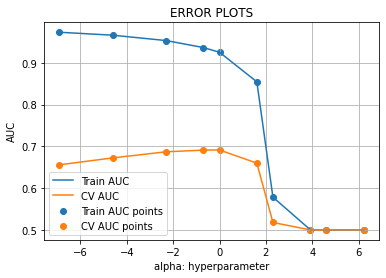

In [30]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
import math
from tqdm import tqdm

train_auc = []
cv_auc = []
log_alpha=[]

alpha = [0.001, 0.01, 0.1, 0.5, 1, 5, 10,50,100,500]

for i in tqdm(alpha):
    MultinomialNB_bow = MultinomialNB(alpha=i,class_prior=[0.5,0.5])
    MultinomialNB_bow.fit(X_train_set_1, y_train)

    y_train_pred = batch_predict(MultinomialNB_bow, X_train_set_1)    
    y_cv_pred = batch_predict(MultinomialNB_bow, X_cv_set_1)
          
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    
for a in tqdm(alpha):
    b = math.log(a)
    log_alpha.append(b)
    
print(alpha)
print('*'*100)
print(log_alpha)

plt.plot(log_alpha, train_auc, label='Train AUC')
plt.plot(log_alpha, cv_auc, label='CV AUC')

plt.scatter(log_alpha, train_auc, label='Train AUC points')
plt.scatter(log_alpha, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [23]:
best_alpha = 0.5

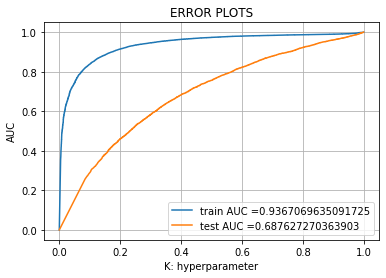

In [24]:
from sklearn.metrics import roc_curve, auc
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
MultinomialNB_bow = MultinomialNB(alpha =best_alpha)
MultinomialNB_bow.fit(X_train_set_1, y_train)


y_train_pred = batch_predict(MultinomialNB_bow, X_train_set_1)    
y_test_pred = batch_predict(MultinomialNB_bow, X_test_set_1)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [25]:
import numpy as np

def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [26]:

print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.7584387002440371 for threshold 0.696
Train confusion matrix
[[ 7103  1002]
 [ 6113 39313]]
Test confusion matrix
[[ 2060  2903]
 [ 5152 22660]]


### hyper parameter tuning using set 2 data and plotting performance of model on each hyper parameter

100%|██████████| 12/12 [00:00<00:00, 36658.16it/s]

[0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 10000]
****************************************************************************************************
[-6.907755278982137, -4.605170185988091, -2.3025850929940455, -0.6931471805599453, 0.0, 1.6094379124341003, 2.302585092994046, 3.912023005428146, 4.605170185988092, 6.214608098422191, 6.907755278982137, 9.210340371976184]


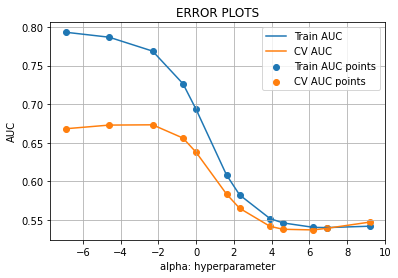

In [32]:

train_auc = []
cv_auc = []
log_alpha=[]

alpha = [0.001, 0.01, 0.1, 0.5, 1, 5, 10,50,100,500,1000,10000]

for i in tqdm(alpha):
    MultinomialNB_TFIDF = MultinomialNB(alpha=i,class_prior=[0.5,0.5])
    MultinomialNB_TFIDF.fit(X_train_set_2, y_train)

    y_train_pred = batch_predict(MultinomialNB_TFIDF, X_train_set_2)    
    y_cv_pred = batch_predict(MultinomialNB_TFIDF, X_cv_set_2)
          
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    
for a in tqdm(alpha):
    b = math.log(a)
    log_alpha.append(b)
    
print(alpha)
print('*'*100)
print(log_alpha)

plt.plot(log_alpha, train_auc, label='Train AUC')
plt.plot(log_alpha, cv_auc, label='CV AUC')

plt.scatter(log_alpha, train_auc, label='Train AUC points')
plt.scatter(log_alpha, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [ ]:
best_alpha = 0.5

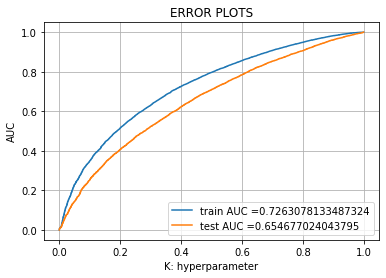

In [28]:
from sklearn.metrics import roc_curve, auc
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
MultinomialNB_TFIDF = MultinomialNB(alpha =best_alpha)
MultinomialNB_TFIDF.fit(X_train_set_2, y_train)


y_train_pred = batch_predict(MultinomialNB_TFIDF, X_train_set_2)    
y_test_pred = batch_predict(MultinomialNB_TFIDF, X_test_set_2)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [34]:
from prettytable import PrettyTable

x_pretty_table = PrettyTable()
x_pretty_table.field_names = ["Model Type","Vectorizer", "Hyper Parameter - alpha","Train-AUC","Test-AUC"]

x_pretty_table.add_row(["Naive Bayes","BOW",0.5,0.93,0.68])
x_pretty_table.add_row([ "Naive Bayes", "TFIDF",0.52,0.72,0.65])

print(x_pretty_table)

+-------------+------------+-------------------------+-----------+----------+
|  Model Type | Vectorizer | Hyper Parameter - alpha | Train-AUC | Test-AUC |
+-------------+------------+-------------------------+-----------+----------+
| Naive Bayes |    BOW     |           0.5           |    0.93   |   0.68   |
| Naive Bayes |   TFIDF    |           0.52          |    0.72   |   0.65   |
+-------------+------------+-------------------------+-----------+----------+
